In [3]:
import numpy as np
import pandas as pd
import xlwt
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

#### Đọc file

In [4]:
file = pd.read_excel("./Sample - Superstore.xls/Sample - Superstore.xls")
file

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# 1.Split data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#lấy 90% data traning
file_90, file_10 = train_test_split(file,test_size=0.1)
file_90

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4584,4585,US-2018-163790,2018-11-02,2018-11-04,Second Class,NL-18310,Nancy Lomonaco,Home Office,United States,Danville,...,94526.0,West,OFF-EN-10001335,Office Supplies,Envelopes,White Business Envelopes with Contemporary Sea...,76.580,7,0.0,38.2900
3071,3072,CA-2015-119375,2015-11-17,2015-11-22,Standard Class,YC-21895,Yoseph Carroll,Corporate,United States,Newark,...,19711.0,East,FUR-FU-10002379,Furniture,Furnishings,Eldon Econocleat Chair Mats for Low Pile Carpets,124.410,3,0.0,14.9292
9195,9196,CA-2015-146843,2015-11-30,2015-12-06,Standard Class,PB-19150,Philip Brown,Consumer,United States,Avondale,...,85323.0,West,TEC-AC-10002550,Technology,Accessories,Memorex 25GB 6X Branded Blu-Ray Recordable Dis...,102.240,4,0.2,-16.6140
105,106,US-2016-156867,2016-11-13,2016-11-17,Standard Class,LC-16870,Lena Cacioppo,Consumer,United States,Aurora,...,80013.0,West,OFF-BI-10002794,Office Supplies,Binders,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",36.882,3,0.7,-25.8174
5157,5158,CA-2018-163006,2018-06-30,2018-07-04,Second Class,GH-14410,Gary Hansen,Home Office,United States,Chicago,...,60653.0,Central,FUR-CH-10000229,Furniture,Chairs,Global Enterprise Series Seating High-Back Swi...,569.058,3,0.3,-178.8468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,5240,CA-2017-116561,2017-09-11,2017-09-17,Standard Class,EB-14110,Eugene Barchas,Consumer,United States,San Jose,...,95123.0,West,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",332.940,3,0.0,6.6588
6811,6812,CA-2018-156237,2018-09-14,2018-09-15,First Class,PS-18760,Pamela Stobb,Consumer,United States,Philadelphia,...,19140.0,East,FUR-CH-10002372,Furniture,Chairs,Office Star - Ergonomically Designed Knee Chair,113.372,2,0.3,-29.1528
2076,2077,CA-2018-140676,2018-09-12,2018-09-15,First Class,BF-11080,Bart Folk,Consumer,United States,Baltimore,...,21215.0,East,OFF-PA-10004082,Office Supplies,Paper,Adams Telephone Message Book w/Frequently-Call...,39.900,5,0.0,19.9500
6770,6771,CA-2018-139402,2018-12-09,2018-12-13,Standard Class,NC-18535,Nick Crebassa,Corporate,United States,Phoenix,...,85023.0,West,OFF-PA-10004359,Office Supplies,Paper,Multicolor Computer Printout Paper,419.400,5,0.2,146.7900


In [32]:
file_10

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9893,9894,US-2017-115441,2017-07-25,2017-07-28,Second Class,SH-19975,Sally Hughsby,Corporate,United States,Milwaukee,...,53209.0,Central,FUR-CH-10004626,Furniture,Chairs,Office Star Flex Back Scooter Chair with Alumi...,403.560,4,0.0,96.8544
6927,6928,CA-2017-140382,2017-06-23,2017-06-25,Second Class,RD-19900,Ruben Dartt,Consumer,United States,San Francisco,...,94109.0,West,OFF-ST-10003638,Office Supplies,Storage,Mobile Personal File Cube,93.680,4,0.0,25.2936
3191,3192,CA-2018-123981,2018-10-02,2018-10-08,Standard Class,RW-19630,Rob Williams,Corporate,United States,New York City,...,10035.0,East,TEC-PH-10002115,Technology,Phones,Plantronics 81402,65.990,1,0.0,17.1574
648,649,CA-2017-160745,2017-12-11,2017-12-16,Second Class,AR-10825,Anthony Rawles,Corporate,United States,Vancouver,...,98661.0,West,FUR-FU-10001935,Furniture,Furnishings,3M Hangers With Command Adhesive,14.800,4,0.0,6.0680
6385,6386,US-2018-104661,2018-01-15,2018-01-18,First Class,TB-21250,Tim Brockman,Consumer,United States,Austin,...,78745.0,Central,TEC-AC-10002331,Technology,Accessories,"Maxell 74 Minute CDR, 10/Pack",62.592,8,0.2,13.3008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,6253,CA-2015-165806,2015-04-07,2015-04-07,Same Day,VM-21685,Valerie Mitchum,Home Office,United States,Marietta,...,30062.0,South,OFF-PA-10003441,Office Supplies,Paper,Xerox 226,58.320,9,0.0,27.9936
1127,1128,CA-2016-105970,2016-03-02,2016-03-07,Standard Class,PA-19060,Pete Armstrong,Home Office,United States,Richmond,...,47374.0,Central,OFF-AR-10003156,Office Supplies,Art,50 Colored Long Pencils,10.160,1,0.0,2.6416
5111,5112,CA-2015-138450,2015-10-18,2015-10-22,Standard Class,EH-13765,Edward Hooks,Corporate,United States,Philadelphia,...,19134.0,East,OFF-PA-10003016,Office Supplies,Paper,"Adams ""While You Were Out"" Message Pads",10.048,4,0.2,3.1400
3097,3098,CA-2018-135692,2018-04-27,2018-05-01,Standard Class,CV-12805,Cynthia Voltz,Corporate,United States,Fort Worth,...,76106.0,Central,OFF-LA-10001158,Office Supplies,Labels,"Avery Address/Shipping Labels for Typewriters,...",33.120,4,0.2,11.5920


In [33]:
#upload file excel
with pd.ExcelWriter("raw_data_90.xls") as writer:
    file_90.to_excel(writer) 

C:\Users\admin\AppData\Local\Temp\ipykernel_16696\3832056568.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  with pd.ExcelWriter("raw_data_90.xls") as writer:


In [34]:
with pd.ExcelWriter("raw_data_10.xls") as writer:
    file_10.to_excel(writer) 

C:\Users\admin\AppData\Local\Temp\ipykernel_16696\3320712146.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  with pd.ExcelWriter("raw_data_10.xls") as writer:


# 2. Data cleaning

### 2.1. Handling Missing Values

In [20]:
data_90 = pd.read_excel('./split_data/raw_data_90.xls')
data_90

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2041,2042,CA-2016-122287,2016-06-18,2016-06-23,Standard Class,SN-20560,Skye Norling,Home Office,United States,...,85345.0,West,FUR-FU-10004973,Furniture,Furnishings,Flat Face Poster Frame,75.360,5,0.2,20.7240
1,4336,4337,CA-2016-154795,2016-12-20,2016-12-24,Standard Class,GZ-14470,Gary Zandusky,Consumer,United States,...,86442.0,West,FUR-FU-10002088,Furniture,Furnishings,Nu-Dell Float Frame 11 x 14 1/2,14.368,2,0.2,3.9512
2,1242,1243,US-2017-162859,2017-02-15,2017-02-22,Standard Class,PG-18820,Patrick Gardner,Consumer,United States,...,10009.0,East,OFF-BI-10004519,Office Supplies,Binders,GBC DocuBind P100 Manual Binding Machine,398.352,3,0.2,124.4850
3,2870,2871,CA-2015-148040,2015-03-22,2015-03-26,Standard Class,BF-11275,Beth Fritzler,Corporate,United States,...,85705.0,West,OFF-PA-10002581,Office Supplies,Paper,Xerox 1951,74.352,3,0.2,23.2350
4,1519,1520,CA-2018-116204,2018-02-11,2018-02-14,Second Class,VW-21775,Victoria Wilson,Corporate,United States,...,94110.0,West,OFF-BI-10001759,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",21.336,7,0.2,7.7343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8989,9384,9385,CA-2018-100433,2018-08-11,2018-08-16,Standard Class,SJ-20125,Sanjit Jacobs,Home Office,United States,...,10009.0,East,OFF-PA-10003441,Office Supplies,Paper,Xerox 226,25.920,4,0.0,12.4416
8990,2138,2139,US-2018-157896,2018-11-16,2018-11-16,Same Day,CB-12415,Christy Brittain,Consumer,United States,...,10009.0,East,OFF-PA-10004092,Office Supplies,Paper,Tops Green Bar Computer Printout Paper,146.820,3,0.0,73.4100
8991,4508,4509,US-2015-138247,2015-12-24,2015-12-29,Standard Class,BF-11170,Ben Ferrer,Home Office,United States,...,90045.0,West,FUR-FU-10002554,Furniture,Furnishings,"Westinghouse Floor Lamp with Metal Mesh Shade,...",23.990,1,0.0,5.5177
8992,365,366,CA-2015-123344,2015-09-24,2015-09-29,Standard Class,JD-16060,Julia Dunbar,Consumer,United States,...,94109.0,West,OFF-ST-10001713,Office Supplies,Storage,"Gould Plastics 9-Pocket Panel Bin, 18-3/8w x 5...",211.960,4,0.0,8.4784


In [21]:
# get the number of missing data points per column
missing_values_count =data_90.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:22]

Unnamed: 0        0
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [22]:
# how many total missing values do we have?
total_cells = np.product(data_90.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.00555926173004225


In [23]:
#Liệt kê các hàng có chứa giá trị null trong một cột được chỉ định.


,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9,9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
2103,9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
2977,9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
3074,5274,5275,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
4527,9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
4571,8798,8799,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
5617,9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
5842,9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588
7103,2234,2235,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
7593,9741,9742,CA-2016-117086,2016-11-08,2016-11-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,...,NaN,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.90,5,0.0,1013.1270


In [25]:
data_90.isnull().sum()

Unnamed: 0       0
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [26]:
x = pd.isnull(data_90['Postal Code'])
data_90[x]

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [64]:
data_10 = pd.read_excel('raw_data_10.xls')
data_10

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,9893,9894,US-2017-115441,2017-07-25,2017-07-28,Second Class,SH-19975,Sally Hughsby,Corporate,United States,...,53209,Central,FUR-CH-10004626,Furniture,Chairs,Office Star Flex Back Scooter Chair with Alumi...,403.560,4,0.0,96.8544
1,6927,6928,CA-2017-140382,2017-06-23,2017-06-25,Second Class,RD-19900,Ruben Dartt,Consumer,United States,...,94109,West,OFF-ST-10003638,Office Supplies,Storage,Mobile Personal File Cube,93.680,4,0.0,25.2936
2,3191,3192,CA-2018-123981,2018-10-02,2018-10-08,Standard Class,RW-19630,Rob Williams,Corporate,United States,...,10035,East,TEC-PH-10002115,Technology,Phones,Plantronics 81402,65.990,1,0.0,17.1574
3,648,649,CA-2017-160745,2017-12-11,2017-12-16,Second Class,AR-10825,Anthony Rawles,Corporate,United States,...,98661,West,FUR-FU-10001935,Furniture,Furnishings,3M Hangers With Command Adhesive,14.800,4,0.0,6.0680
4,6385,6386,US-2018-104661,2018-01-15,2018-01-18,First Class,TB-21250,Tim Brockman,Consumer,United States,...,78745,Central,TEC-AC-10002331,Technology,Accessories,"Maxell 74 Minute CDR, 10/Pack",62.592,8,0.2,13.3008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6252,6253,CA-2015-165806,2015-04-07,2015-04-07,Same Day,VM-21685,Valerie Mitchum,Home Office,United States,...,30062,South,OFF-PA-10003441,Office Supplies,Paper,Xerox 226,58.320,9,0.0,27.9936
996,1127,1128,CA-2016-105970,2016-03-02,2016-03-07,Standard Class,PA-19060,Pete Armstrong,Home Office,United States,...,47374,Central,OFF-AR-10003156,Office Supplies,Art,50 Colored Long Pencils,10.160,1,0.0,2.6416
997,5111,5112,CA-2015-138450,2015-10-18,2015-10-22,Standard Class,EH-13765,Edward Hooks,Corporate,United States,...,19134,East,OFF-PA-10003016,Office Supplies,Paper,"Adams ""While You Were Out"" Message Pads",10.048,4,0.2,3.1400
998,3097,3098,CA-2018-135692,2018-04-27,2018-05-01,Standard Class,CV-12805,Cynthia Voltz,Corporate,United States,...,76106,Central,OFF-LA-10001158,Office Supplies,Labels,"Avery Address/Shipping Labels for Typewriters,...",33.120,4,0.2,11.5920


In [65]:
# get the number of missing data points per column
missing_values_count =data_10.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:22]

Unnamed: 0       0
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### 2.2. Inconsistent Data Entry

In [40]:
states = data_90['State'].unique()

# sort them alphabetically and then take a closer look
states.sort()
states

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [41]:
sub_category = data_90['Sub-Category'].unique()

# sort them alphabetically and then take a closer look
sub_category.sort()
sub_category

array(['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases',
       'Chairs', 'Copiers', 'Envelopes', 'Fasteners', 'Furnishings',
       'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies',
       'Tables'], dtype=object)

In [40]:
states = data_10['State'].unique()

# sort them alphabetically and then take a closer look
states.sort()
states

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Virginia', 'Washington',
       'Wisconsin'], dtype=object)

* Thực hiện việc kiểm tra các trường dữ liệu khác đều không có dữ liệu Inconsistent

### 2.3. Outliers

##### Phát hiện (Boxplot)

<AxesSubplot:>

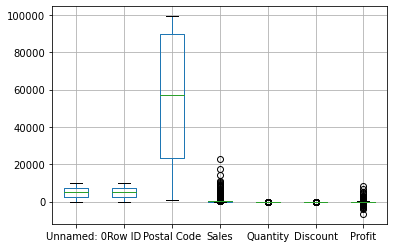

In [4]:
#Sử dụng biểu đồ Boxplot phát hiện ngoại lai
data_90.boxplot()

<AxesSubplot:>

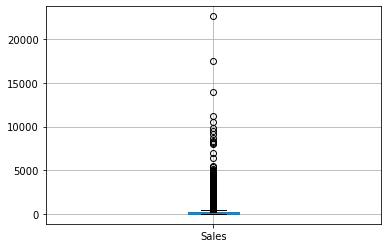

In [9]:
data_90[['Sales']].boxplot()


In [12]:
q1 = np.quantile(data_90['Sales'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(data_90['Sales'], 0.75)
med = np.median(data_90['Sales'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

192.61 498.9175 -271.52250000000004


In [28]:
outliers = data_90['Sales'][(data_90['Sales'] <= lower_bound) | (data_90['Sales'] >= upper_bound)]
print('The following are the outliers in the boxplot:\n{}'.format(outliers))

The following are the outliers in the boxplot:
7        907.152
13       754.450
15      1272.630
25       538.194
52       542.940
          ...   
8977     915.136
8979     698.352
8985     646.776
8987    1649.950
8993    3040.000
Name: Sales, Length: 1058, dtype: float64


<AxesSubplot:>

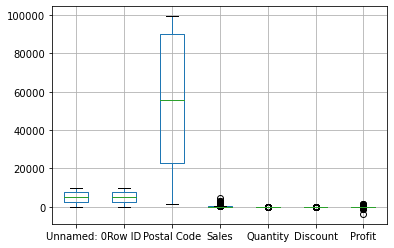

In [41]:
#Sử dụng biểu đồ Boxplot phát hiện ngoại lai
data_10.boxplot()

In [42]:
q1 = np.quantile(data_10['Sales'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(data_10['Sales'], 0.75)
med = np.median(data_10['Sales'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

183.888 475.63 -259.92199999999997


In [43]:
outliers = data_10['Sales'][(data_10['Sales'] <= lower_bound) | (data_10['Sales'] >= upper_bound)]
print('The following are the outliers in the boxplot:\n{}'.format(outliers))

The following are the outliers in the boxplot:
5       914.970
10      528.430
41     2504.740
44      600.558
49     1931.958
         ...   
933     616.998
943    2799.960
947    1488.424
959    1040.800
980    1123.920
Name: Sales, Length: 118, dtype: float64


In [44]:
q1 = np.quantile(data_10['Profit'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(data_10['Profit'], 0.75)
med = np.median(data_10['Profit'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

28.67655 73.26307500000001 -41.443124999999995


In [45]:
outliers = data_10['Profit'][(data_10['Profit'] <= lower_bound) | (data_10['Profit'] >= upper_bound)]
print('The following are the outliers in the boxplot:\n{}'.format(outliers))

The following are the outliers in the boxplot:
0       96.8544
5      411.7365
16     130.4913
41     626.1850
42     103.8180
         ...   
954   -147.8655
959    281.0160
977    -84.4480
980   -182.6370
989     91.9680
Name: Profit, Length: 170, dtype: float64


In [68]:
data_90.to_excel('data_90_new.xlsx', index=False, header=True)


In [69]:
data_10.to_excel('data_10_new.xlsx', index=False, header=True)